In [1]:
# https://nextjournal.com/gkoehler/pytorch-mnist
# https://towardsdatascience.com/handwritten-digit-mnist-pytorch-977b5338e627

In [2]:
import torch
import torchvision

In [3]:
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [ ]:
# dataset -> images, transform
# for e in epochs:
    # dataloader -> iteration -> for images, lables in dataloder:
    # model -> pred_label = model(images)
    # criterion -> loss = criterion(pred_label, label)
    # loss.backprop
    # optimizer -> optim.step

In [ ]:
# class FaceLandmarksDataset(Dataset):
#     """Face Landmarks dataset."""

#     def __init__(self, csv_file, root_dir, transform=None):
#         """
#         Args:
#             csv_file (string): Path to the csv file with annotations.
#             root_dir (string): Directory with all the images.
#             transform (callable, optional): Optional transform to be applied
#                 on a sample.
#         """
#         self.landmarks_frame = pd.read_csv(csv_file)
#         self.root_dir = root_dir
#         self.transform = transform

#     def __len__(self):
#         return len(self.landmarks_frame)

#     def __getitem__(self, idx):
#         if torch.is_tensor(idx):
#             idx = idx.tolist()

#         img_name = os.path.join(self.root_dir,
#                                 self.landmarks_frame.iloc[idx, 0])
#         image = io.imread(img_name)
#         landmarks = self.landmarks_frame.iloc[idx, 1:]
#         landmarks = np.array([landmarks])
#         landmarks = landmarks.astype('float').reshape(-1, 2)
#         sample = {'image': image, 'landmarks': landmarks}

#         if self.transform:
#             sample = self.transform(sample)

#         return sample

In [ ]:
# from PIL import Image
# Image.open('path/to/img')

In [ ]:
# channels x dim x dim
# 1 x 28 x 28

In [ ]:
# for e in epochs:
#     for data, label in dataloader:

In [ ]:
# [
# [[1 ,2],
#  [2, 3]]
# [[1 ,2],
#  [2, 3]]
# [[1 ,2],
#  [2, 3]]
# ]

# 3x28x28
# 1x28x28 -> R
# 1x28x28 -> G
# 1x28x28 -> B

# opencv
# img = cv2.imread()
# img.shape
# 28x28x3

In [96]:
transforms = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.1307,), (0.3081,))
])

In [25]:
train_dataset = torchvision.datasets.MNIST('/files/', train=True, download=True, transform=transforms)
test_dataset = torchvision.datasets.MNIST('/files/', train=False, download=True, transform=transforms)

In [97]:
len(train_dataset), len(test_dataset)

(60000, 10000)

In [98]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: /files/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )

In [26]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size_train, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size_test, shuffle=False)

In [99]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [100]:
example_data.shape, example_targets.shape

(torch.Size([1000, 1, 28, 28]), torch.Size([1000]))

In [ ]:
# for idx, (data, label) in enumerate(test_loader):
#     data = 1000, 1,28,28
#     label= 1000

In [ ]:
# pytorch lightning

In [136]:
# data augment
rotater = torchvision.transforms.RandomRotation(degrees=(0, 180))

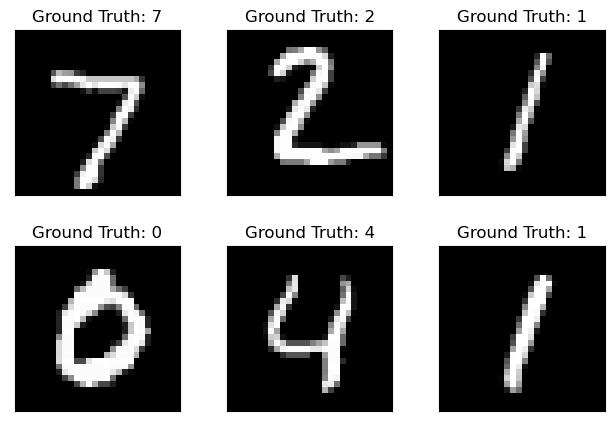

In [138]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray')
#     plt.imshow(rotater(example_data[i])[0], cmap='gray', interpolation='none')
    plt.title("Ground Truth: {}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])

# FCNN

In [139]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from time import time
import numpy as np

In [110]:
# softmax = exp(x)/(sum_x exp(x))

In [142]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [112]:
# model = Net()
# model(img)
# torch.tensor(size, requires_grad=True)

In [113]:
# class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
        
#         self.fc1 = nn.Linear(784, 128)
#         self.fc2 = nn.Linear(128, 64)
#         self.fc3 = nn.Linear(64, 10)

#     def forward(self, x):
#         x = x.view(-1, 784)
# #         x.shape = 1000, 784
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = self.fc3(x)
#         return F.log_softmax(x)

In [141]:
model[2].weight.shape, model[2].weight

(torch.Size([64, 128]),
 Parameter containing:
 tensor([[ 0.0628, -0.0412,  0.0645,  ..., -0.0816,  0.0515, -0.0111],
         [ 0.0575, -0.0193, -0.0518,  ..., -0.0262, -0.0826, -0.0479],
         [ 0.0851, -0.0130,  0.0568,  ...,  0.0755,  0.0441, -0.0348],
         ...,
         [ 0.0428,  0.0458, -0.0801,  ...,  0.0292,  0.0554,  0.0112],
         [ 0.0434,  0.0882, -0.0880,  ..., -0.0500,  0.0604, -0.0427],
         [ 0.0031,  0.0471,  0.0229,  ..., -0.0645,  0.0445, -0.0683]],
        requires_grad=True))

In [115]:
model[2].bias.shape, model[2].bias

(torch.Size([64]),
 Parameter containing:
 tensor([-0.0323,  0.0086, -0.0338, -0.0231, -0.0107,  0.0447, -0.0234,  0.0570,
         -0.0612, -0.0814, -0.0616,  0.0666, -0.0507, -0.0848, -0.0345,  0.0699,
         -0.0486,  0.0664,  0.0754, -0.0083, -0.0836, -0.0742, -0.0501, -0.0838,
          0.0505, -0.0731,  0.0554,  0.0439, -0.0337,  0.0250,  0.0530, -0.0414,
          0.0845, -0.0384,  0.0007,  0.0117, -0.0529,  0.0849, -0.0720,  0.0677,
          0.0176,  0.0198,  0.0476, -0.0358,  0.0673,  0.0410,  0.0336, -0.0579,
         -0.0351, -0.0678, -0.0574, -0.0577, -0.0146,  0.0327,  0.0343, -0.0387,
          0.0371,  0.0047,  0.0758,  0.0378,  0.0094, -0.0061,  0.0451,  0.0809],
        requires_grad=True))

In [143]:
criterion = nn.NLLLoss()
images, labels = next(iter(train_loader))
# batch_size x channels x dim x dim
images = images.view(images.shape[0], -1)

images.shape, labels.shape

(torch.Size([64, 784]), torch.Size([64]))

In [118]:
logps = model(images) #log probabilities
logps.shape

torch.Size([64, 10])

In [119]:
loss = criterion(logps, labels) #calculate the NLL loss
loss

tensor(2.3007, grad_fn=<NllLossBackward0>)

In [120]:
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0006,  0.0006,  0.0006,  ...,  0.0006,  0.0006,  0.0006],
        [ 0.0003,  0.0003,  0.0003,  ...,  0.0003,  0.0003,  0.0003],
        [-0.0009, -0.0009, -0.0009,  ..., -0.0009, -0.0009, -0.0009],
        ...,
        [-0.0014, -0.0014, -0.0014,  ..., -0.0014, -0.0014, -0.0014],
        [-0.0008, -0.0008, -0.0008,  ..., -0.0008, -0.0008, -0.0008],
        [ 0.0002,  0.0002,  0.0002,  ...,  0.0002,  0.0002,  0.0002]])


In [ ]:
# torch.gpu.is_available()
# model.to('cuda')
# images, labels = images.to('cuda'), labels.to('cuda')

In [144]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
training_loss = []
model.train()
for e in range(epochs):
    running_loss = 0
    for images, labels in train_loader:
        # Flatten MNIST images into a 784 long vector
#         images batchsize, channels, [28, 28]
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    training_loss.append(running_loss)
    print("Epoch {} - Training loss: {}".format(e, running_loss/len(train_loader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.5154919199296025
Epoch 1 - Training loss: 0.2054988747355399
Epoch 2 - Training loss: 0.14778553632729408
Epoch 3 - Training loss: 0.11601737978905916
Epoch 4 - Training loss: 0.09441838643180012
Epoch 5 - Training loss: 0.0790914207694929
Epoch 6 - Training loss: 0.06807717417718283
Epoch 7 - Training loss: 0.059096943833051065
Epoch 8 - Training loss: 0.050694673800958136
Epoch 9 - Training loss: 0.043909028580318935
Epoch 10 - Training loss: 0.03800334566201308
Epoch 11 - Training loss: 0.03446140822627818
Epoch 12 - Training loss: 0.029503208312165262
Epoch 13 - Training loss: 0.025902314787804543
Epoch 14 - Training loss: 0.022385351754514487

Training Time (in minutes) = 3.06924299399058


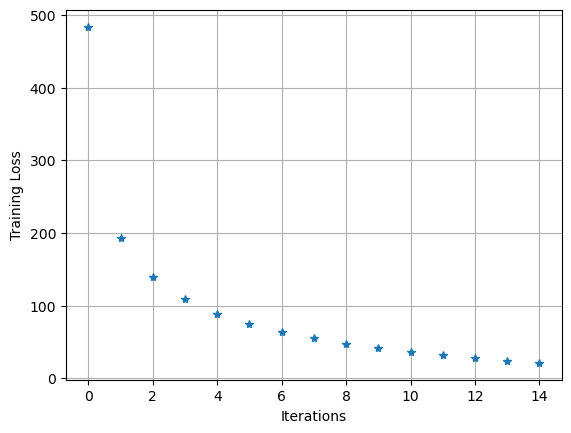

In [145]:
plt.plot(training_loss, '*')
plt.xlabel('Iterations')
plt.ylabel('Training Loss')
plt.grid()

In [146]:
correct_count, all_count = 0, 0

model.eval()
for images,labels in test_loader:
    for i in range(len(labels)):
        img = images[i].view(1, 784)
        with torch.no_grad():
            logps = model(img)

        ps = torch.exp(logps)
        probab = list(ps.numpy()[0])
        pred_label = probab.index(max(probab))
        true_label = labels.numpy()[i]
        if(true_label == pred_label):
            correct_count += 1
        all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9784


In [123]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze(), cmap='gray')
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

In [126]:
images.shape

torch.Size([1000, 1, 28, 28])

In [ ]:
# shape : images.view(-1, 784)

In [129]:
images[2].shape

torch.Size([1, 28, 28])

Predicted Digit = 9


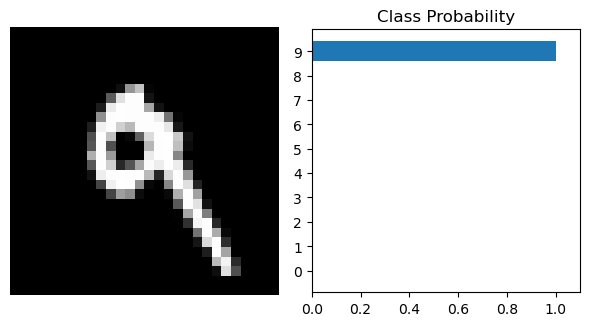

In [149]:
images, labels = next(iter(test_loader))

img = images[7].view(1, 784)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

In [89]:
## custom dataset
## data augmentation

# Convnet

In [87]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [88]:
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

network = Net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)

In [13]:
# Training the Model

In [75]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [76]:
def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
            epoch, batch_idx * len(data), len(train_loader.dataset),
            100. * batch_idx / len(train_loader), loss.item()))
            train_losses.append(loss.item())
            train_counter.append(
            (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
            torch.save(network.state_dict(), 'model.pth')
            torch.save(optimizer.state_dict(), 'optimizer.pth')

In [77]:
def test():
    network.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = network(data)
            test_loss += F.nll_loss(output, target, size_average=False).item()
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
        test_loss /= len(test_loader.dataset)
        test_losses.append(test_loss)
        print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [78]:
test()
for epoch in range(1, n_epochs + 1):
    train(epoch)
    test()

C:\Users\kazim\AppData\Local\Temp\ipykernel_28920\161431047.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)



Test set: Avg. loss: 2.3127, Accuracy: 980/10000 (10%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.302778
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.321150
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.302725
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.298921
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.277651
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.242317
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.258919
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.305950
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.124266
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.106320
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.027337
Train Epoch: 1 [7040/60000 (12%)]	Loss: 1.926354
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.820624
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.774836
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.739427
Train Epoch: 1 [9600/60000 (16%)]	Loss: 1.560869
Train Epoch: 1 [10240/60000 (17%)]	Loss: 1.369069
Train Epoch: 1 [10880/60000 (18%)]	Loss: 1.412886
Train Epoch: 1 [11520/60000 (19%)]	Loss: 1.194768
Train Epoch: 1 [12160/

Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.437733
Train Epoch: 2 [45440/60000 (76%)]	Loss: 0.469155
Train Epoch: 2 [46080/60000 (77%)]	Loss: 0.372118
Train Epoch: 2 [46720/60000 (78%)]	Loss: 0.329229
Train Epoch: 2 [47360/60000 (79%)]	Loss: 0.413716
Train Epoch: 2 [48000/60000 (80%)]	Loss: 0.215650
Train Epoch: 2 [48640/60000 (81%)]	Loss: 0.296962
Train Epoch: 2 [49280/60000 (82%)]	Loss: 0.362621
Train Epoch: 2 [49920/60000 (83%)]	Loss: 0.283856
Train Epoch: 2 [50560/60000 (84%)]	Loss: 0.360456
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.432423
Train Epoch: 2 [51840/60000 (86%)]	Loss: 0.657077
Train Epoch: 2 [52480/60000 (87%)]	Loss: 0.444579
Train Epoch: 2 [53120/60000 (88%)]	Loss: 0.270065
Train Epoch: 2 [53760/60000 (90%)]	Loss: 0.422876
Train Epoch: 2 [54400/60000 (91%)]	Loss: 0.214693
Train Epoch: 2 [55040/60000 (92%)]	Loss: 0.452298
Train Epoch: 2 [55680/60000 (93%)]	Loss: 0.392370
Train Epoch: 2 [56320/60000 (94%)]	Loss: 0.335783
Train Epoch: 2 [56960/60000 (95%)]	Loss: 0.331494


In [81]:
len(train_losses), len(test_losses)

(282, 4)

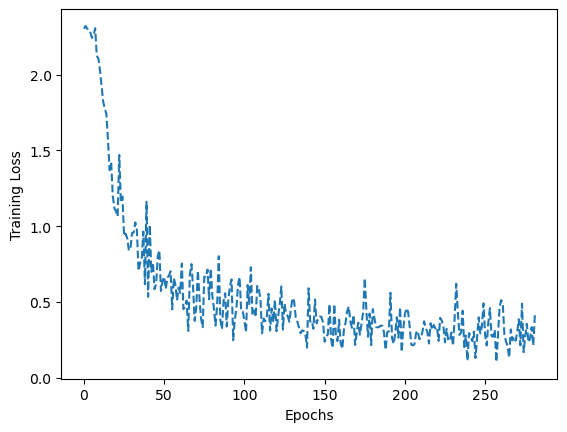

In [84]:
plt.plot(train_losses, '--')
plt.ylabel('Training Loss')
plt.xlabel('Epochs');